In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

%matplotlib inline

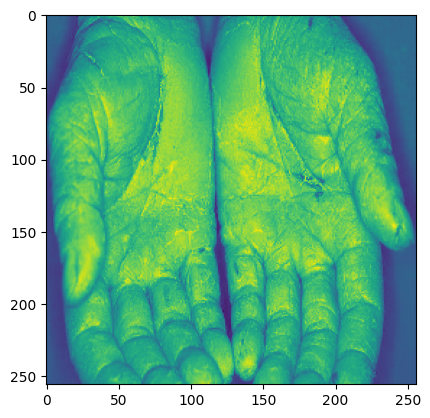

In [ ]:
image = None
for file in glob.glob("/content/drive/MyDrive/Datasets/fitzpatrickImages/*.*"):
  filename = file.split("/")[6].strip()
  # Read in the image
  image = cv2.imread(file)
  image = cv2.resize(image,(256,256))

  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  plt.imshow(image)


  break

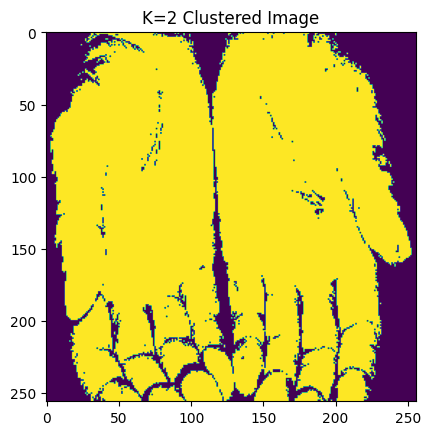

In [ ]:

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,1))

# Convert to float type
pixel_vals = np.float32(pixel_vals)



#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.title("K=2 Clustered Image")
plt.imshow(segmented_image)

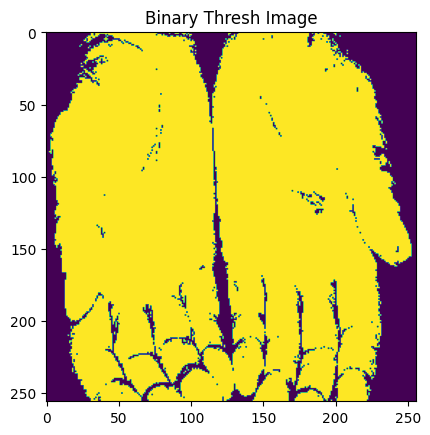

In [ ]:
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.title("Binary Thresh Image")
plt.imshow(binary_image)



34

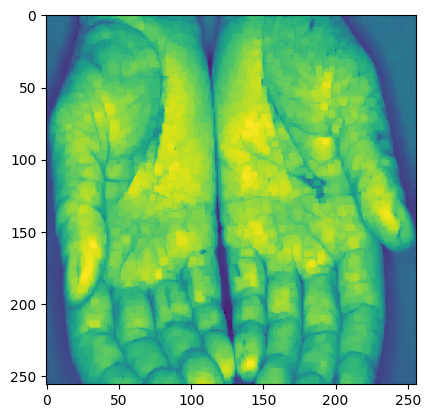

In [ ]:
#morphological operations

kernel = np.ones((4, 4), np.uint8)

erosion = cv2.erode(image, kernel, iterations=10)
dilation = cv2.dilate(image, kernel, iterations=10)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening)

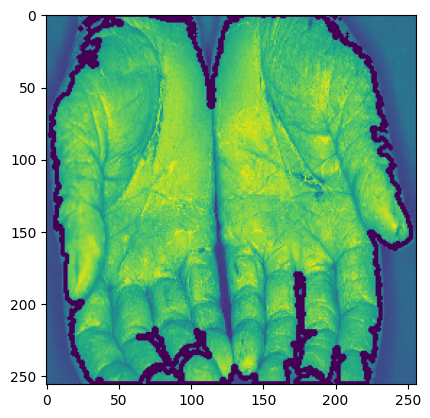

In [ ]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the original image to draw contours on
contour_image = image.copy()

# Draw contours on the image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(contour_image)

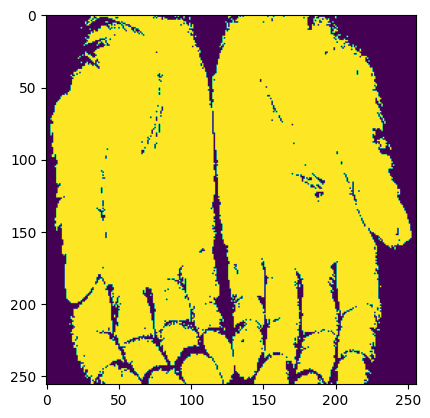

In [ ]:
_, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_image)